In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load data
df = pd.read_csv("../data/final_shelters_and_campsites.csv", index_col=0)
df.head()

,place_type,name,capacity,is_free,altitude,country,region,place,latitude,longitude,num_nearby_routes,num_services
0,0,Refugio FUENTE DEL PUERTO,0,0,1724.0,Spain,Aragon,Teruel,40.5081,-1.65051,4,0
1,1,Camping Yolimar,240,0,18.0,Spain,Asturias,Asturias,43.5527,-6.19617,4,0
2,0,Refugio HOYA DE LA MORA,0,0,2524.0,Spain,Andalusia,Granada,37.0941,-3.38409,8,0
3,0,Refugio MONSANT NATURA,32,0,534.0,Spain,Catalonia,Tarragona,41.2648,0.90469,25,0
4,1,Camping San Pedro,0,0,18.0,Spain,Galicia,A Coruña,43.3819,-8.28903,1,0


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
place_type,1472.0,0.336957,0.472831,0.0000,0.000000,0.000000,1.000000,1.00000
capacity,1472.0,10.808424,24.991038,0.0000,0.000000,4.000000,10.000000,490.00000
is_free,1472.0,0.432065,0.495532,0.0000,0.000000,0.000000,1.000000,1.00000
altitude,1460.0,1146.176027,738.802993,-5.0000,544.750000,1171.500000,1724.250000,3270.00000
latitude,1472.0,41.071573,2.209489,27.9405,40.138400,42.074800,42.641825,43.56220
longitude,1472.0,-1.854596,3.263811,-17.8363,-4.166355,-1.368395,0.645108,3.79623
num_nearby_routes,1472.0,18.724864,21.654879,0.0000,4.000000,11.000000,24.000000,97.00000
num_services,1472.0,0.906929,1.661793,0.0000,0.000000,0.000000,1.000000,12.00000


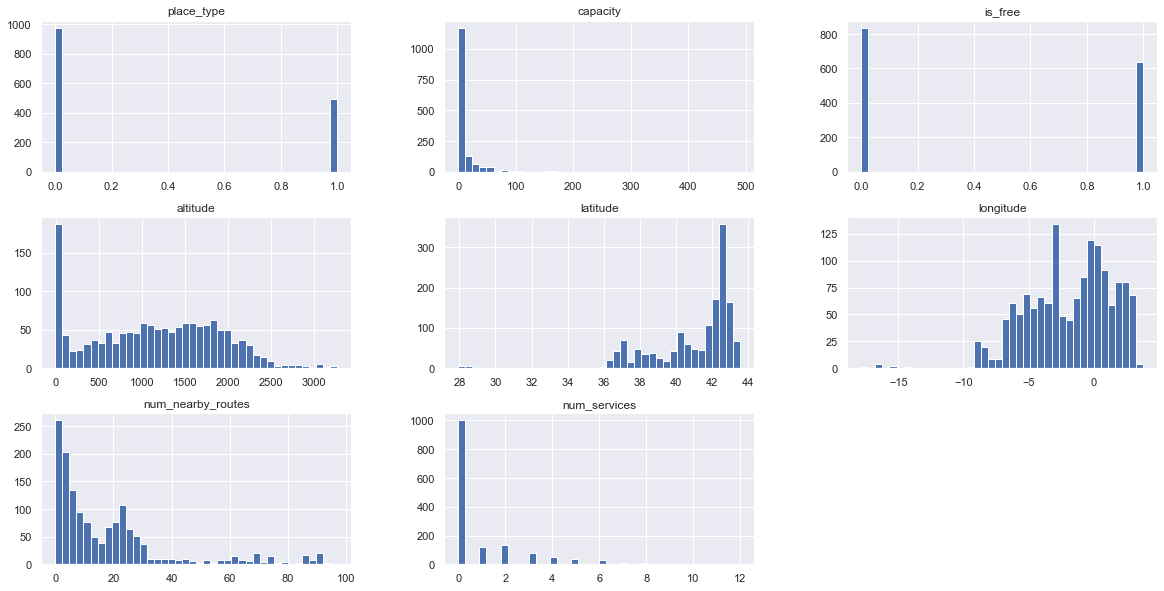

In [17]:
# Histogrames de les variables numèriques amb més de 4 valors
df.hist(bins=40, figsize=(20,10));

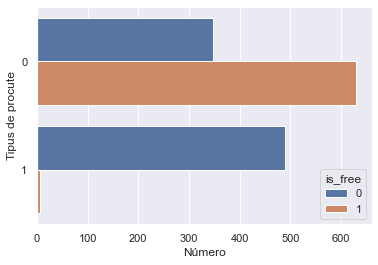

In [18]:
# A continuació visualitzaré quin tipus de producte es compra en cada branca
sns.countplot(y ='place_type', hue = "is_free", data = df) 
plt.xlabel('Número')
plt.ylabel('Tipus de procute')
plt.show()

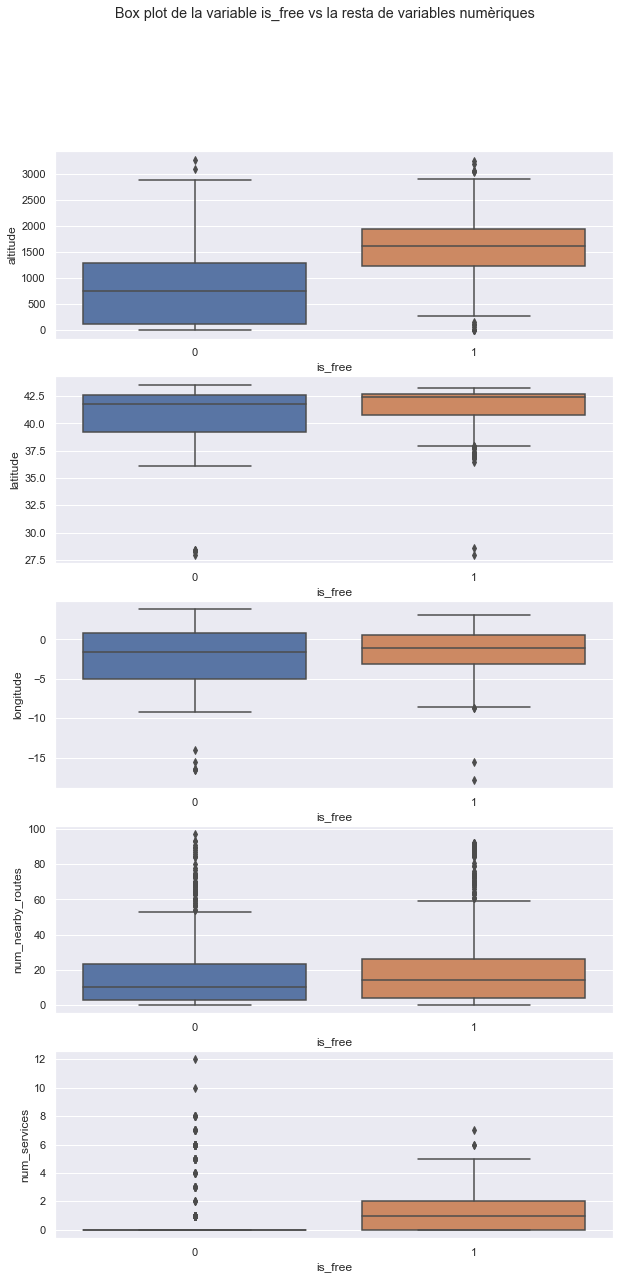

In [19]:
# Boxplot
columns = ['altitude', 'latitude', 'longitude', 'num_nearby_routes', 'num_services']

fig, axes = plt.subplots(5, 1, figsize= (10,20))

fig.suptitle('Box plot de la variable is_free vs la resta de variables numèriques')
for i in range(len(columns)):
    sns.boxplot(ax=axes[i-1], data=df, x='is_free', y=df[columns[i-1]])

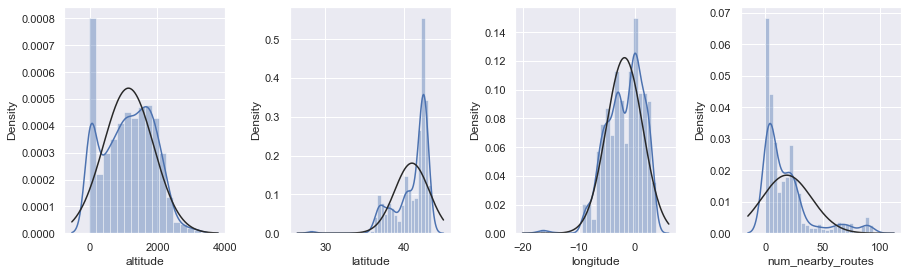

In [20]:
# Test de normalitat
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 5):
    ax = fig.add_subplot(2, 4, i)
    sns.distplot(df[columns[i-1]], fit = norm, ax=ax)

plt.show()

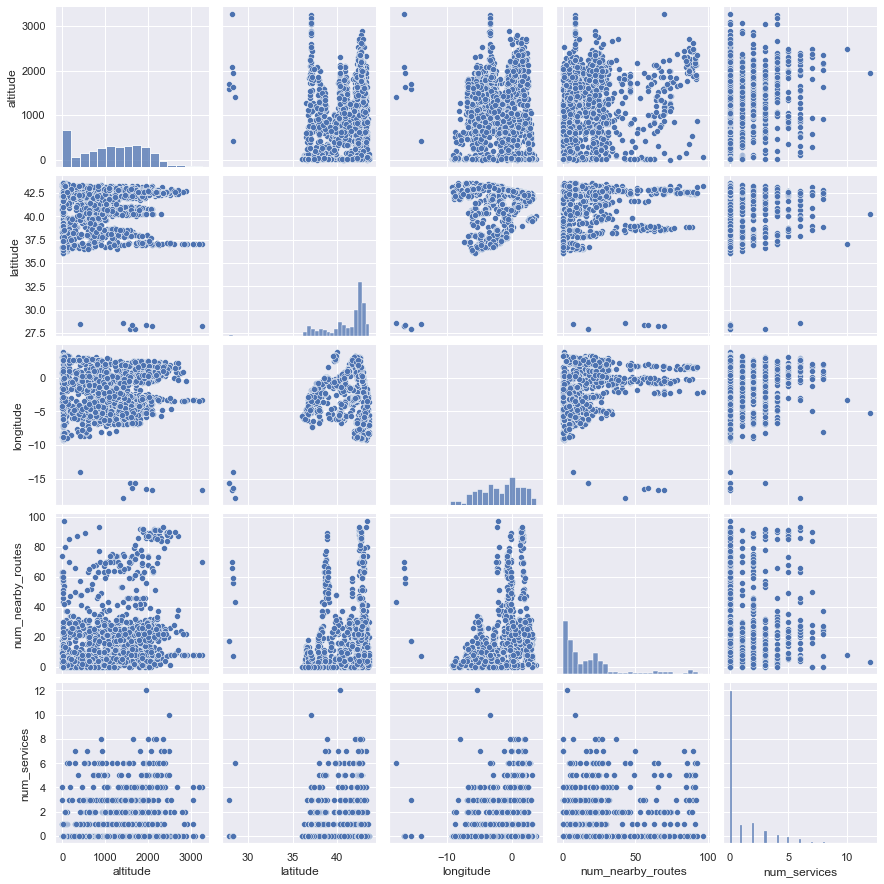

In [8]:
# Anàlisi bivariant
sns.set()
sns.pairplot(df[columns], size = 2.5)
plt.show()

<AxesSubplot:>

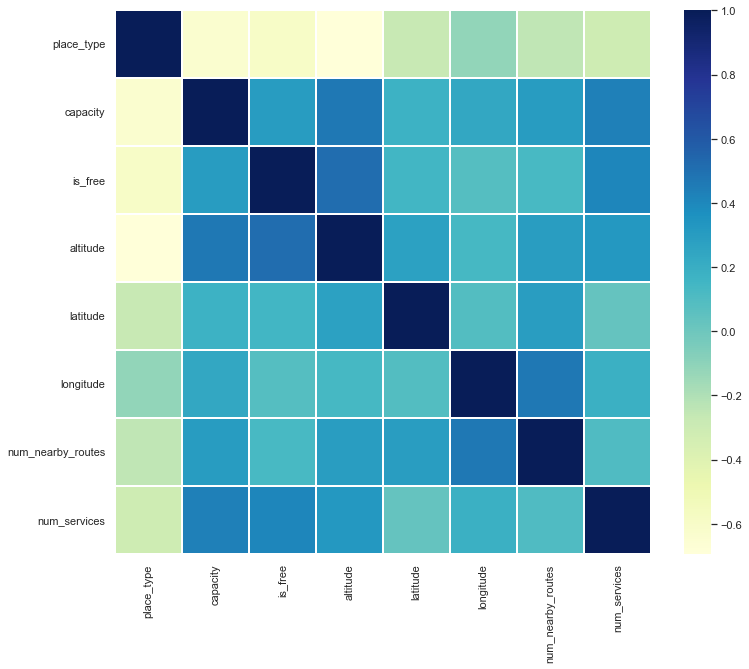

In [21]:
#Anàlisi multivariant
corrmat = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

In [22]:
#Coeficient de correlació
from scipy.stats import pearsonr
for col in columns:
    corr, _ = pearsonr(df['is_free'], df[col])
    print('Pearsons correlation: %.3f' % corr)

ValueError: array must not contain infs or NaNs

In [23]:
#Covariance
from numpy import cov
for col in columns:
    covariance = cov(df['is_free'], df[col])
    print("Covariance {0}: {1}".format(col, covariance))

Covariance altitude: [[0.24555168        nan]
 [       nan        nan]]
Covariance latitude: [[0.24555168 0.16906023]
 [0.16906023 4.88183947]]
Covariance longitude: [[ 0.24555168  0.17169492]
 [ 0.17169492 10.65246284]]
Covariance num_nearby_routes: [[2.45551680e-01 1.32222054e+00]
 [1.32222054e+00 4.68933766e+02]]
Covariance num_services: [[0.24555168 0.20135482]
 [0.20135482 2.7615563 ]]


In [13]:
# Coeficient d'assimetria
for col in columns [1:]:
    print(col + ": ", df[col].skew())

latitude:  -1.732205177441282
longitude:  -0.6757129660837499
num_nearby_routes:  1.8039160367073355
num_services:  2.153308892038139
